In [21]:
%matplotlib inline

# importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm , datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay , plot_roc_curve ,roc_curve , roc_auc_score

# loading the dataset

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

# creating independent and dependent variables

In [24]:
x = iris.data
y = iris.target
class_names = iris.target_names
print(class_names)

['setosa' 'versicolor' 'virginica']


# splitting the dataset into testing and training set

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y, random_state = 0)

# classifying using svm and confusion matrix

[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


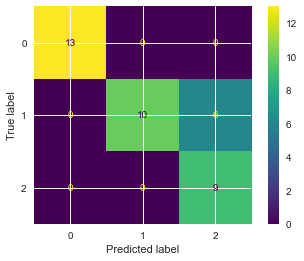

In [26]:
classifier = svm.SVC(kernel = 'linear' , C = 0.01).fit(x_train , y_train)
classifier_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,classifier_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

# roc curve

[0.  0.6 1.  1. ] [0. 0. 0. 1.] [3 2 1 0]


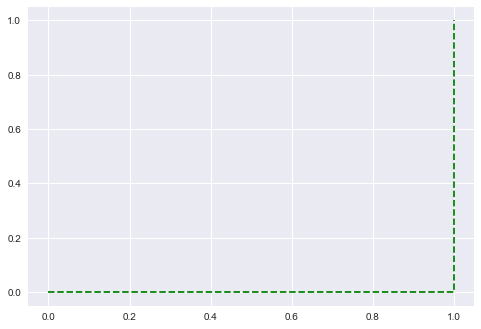

In [27]:
from sklearn import metrics
fpr1 , tpr1 , thresholds1 = metrics.roc_curve(y_test,classifier_pred,pos_label=0)
print(fpr1,tpr1,thresholds1)
plt.style.use('seaborn')
plt.plot(fpr1,tpr1,linestyle='--',color = 'green')

# classif=ying using Logistic Regression and confusion matrix

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


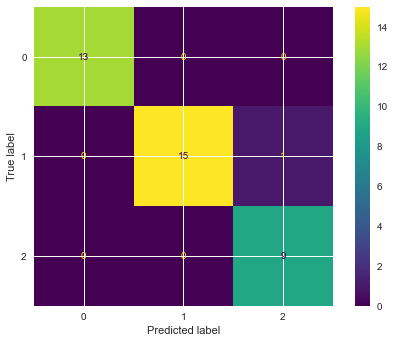

In [28]:
logistic = LogisticRegression(max_iter = 10000).fit(x_train,y_train)
logistic_pred = logistic.predict(x_test)
cm = confusion_matrix(y_test,logistic_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

# roc curve

[0.  0.4 1.  1. ] [0. 0. 0. 1.] [3 2 1 0]


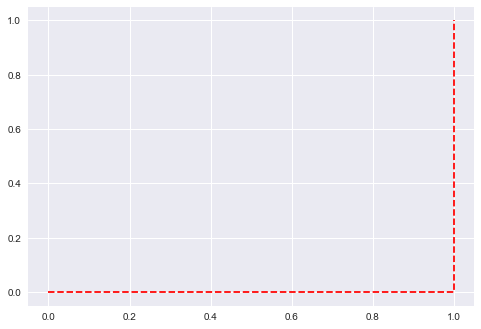

In [29]:
from sklearn import metrics
fpr1 , tpr1 , thresholds1 = metrics.roc_curve(y_test,logistic_pred,pos_label=0)
plt.style.use('seaborn')
print(fpr1,tpr1,thresholds1)
plt.plot(fpr1,tpr1,linestyle='--',color='red')


# Classification Report

In [30]:
print(f"{classification_report(y_test,classifier_pred,target_names = class_names)}")
print("\n" * 5)
print(f"{classification_report(y_test,logistic_pred,target_names = class_names)}")

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.60      1.00      0.75         9

    accuracy                           0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38







              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

